# Natural Language Processing (NLP)

**Note:** The dataset used is the [Yelp Review Data Set](https://www.kaggle.com/c/yelp-recsys-2013) from Kaggle

I will be displaying my questions, solutions, visualizations, and observations of the data.

***
**Spotlight:**
- Data Analysis with Numpy / Pandas
- Data Visualization with Matplotlib
- Data Visualization with Seaborn
- Use of CountVectorization
- Use of MultinomialNB
- Use of Naive Bayes
- Use of TfidfTransformer
***

By Tashaun Nacci

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [6]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which represents the number of words in the text column.**

In [9]:
yelp['text length'] = yelp['text'].apply(len)

In [10]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


**Creating a grid of histograms of text length based off of the star ratings (1-5).**

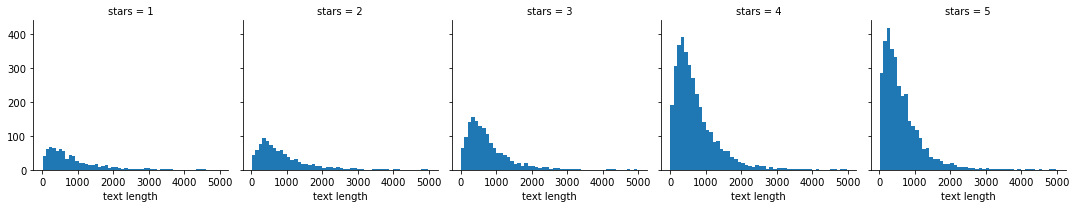

In [11]:
grid = sns.FacetGrid(data = yelp, col = 'stars')
grid.map(plt.hist, 'text length', bins = 50)
# Observation:
# The distribution is about the same for all the number of stars
# The amount of reviews seem to be higher toward 4-5 stars

**Creating a boxplot of text length for each star category.**

<AxesSubplot:xlabel='stars', ylabel='text length'>

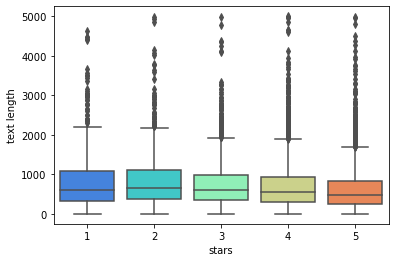

In [12]:
sns.boxplot(data = yelp, x = 'stars', y= 'text length', palette = 'rainbow')

# Observation: This isn't that great of a plot, there are too many outliers

**Creating a countplot of the number of occurrences for each type of star rating.**

<AxesSubplot:xlabel='stars', ylabel='count'>

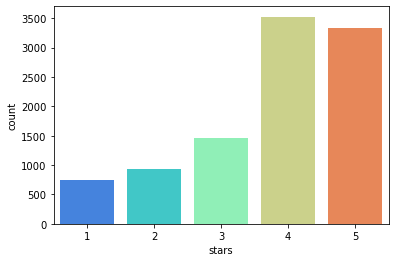

In [13]:
sns.countplot(data = yelp, x = 'stars', palette = 'rainbow')

# Observation: There are many more 4 and 5 star reviews

**Getting the mean values of the numerical columns so I can create a dataframe.**

In [14]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Using the corr() method on the created dataframe**

In [15]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Making a heatmap using the correlation dataframe**

<AxesSubplot:>

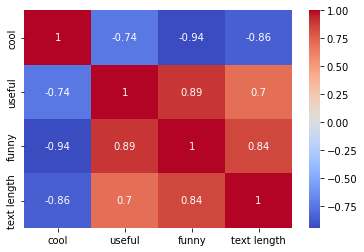

In [16]:
sns.heatmap(data = stars.corr(), cmap = 'coolwarm', annot = True)

# Funny is highly correlated to useful
# Useful and Funny is highly correlated to text length

**Creating a dataframe 'yelp_class' that contains the columns of yelp dataframe but for 1 or 5 star reviews.**

In [17]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


**Creating my features and target/labels for the classifier.**

In [18]:
X = yelp_class['text'] #features
y = yelp_class['stars'] #labels

**Importing CountVectorizer to create a CountVectorizer object.**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

**Using the fit_transform method on the CountVectorizer object and passing in X, the 'text' column.**

In [20]:
X = cv.fit_transform(X)

**Splitting the data into testing and training data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Importing MultinomialNB and creating an instance of the estimator**

In [23]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

**Fitting nb using the training data.**

In [24]:
nb.fit(X_train, y_train)

MultinomialNB()

**Using the predict method to make predictions on the test data**

In [25]:
predictions = nb.predict(X_test)

**Displaying results using a confusion matrix and classification report (Comparing predictions and y_test (test set labels)**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

# Around 90% f1-score, precision, and recall

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**Importing Pipeline and TfidfTransformer from sklearn. **

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer


In [29]:
from sklearn.pipeline import Pipeline

**Creating a pipeline using CountVectorizer and MultinomialNB, but this time including TfidfTransformer**

In [30]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), # strings to token integer counts
    ('tfidf', TfidfTransformer()), # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()) # train on TF-IDF vectors w/ Naive Bayes classifier
])

**Using the created pipeline that has all pre-processing steps in it already, so I need to re-split the original data (Since X was overwrote as the CountVectorized version, all that is needed is the text).**

**Redoing the train test split on the yelp_class object.**

In [31]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Fitting the pipeline to the training data (Not using the previous training data because that data has already been vectorized. So I am just passing in the text and labels here.**

In [32]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

**Making predictions on the data then creating a classification report and confusion matrix.**

In [33]:
predictions  = pipeline.predict(X_test)

In [34]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

# Tfidf actually made the model perform worse 

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/Users/tashaun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tashaun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tashaun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
